# Logistic regression

Goals:
- hand-code the logistic regression algorithm on toy dataset
- train the algorithm
- estimate the error

## Import basic libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline


## Create a toy dataset

In [2]:
import math

N = 100
D = 3

# data is coming from 2 normal distributions
# first 2 dimensions are features
# third dimension is label
def generate_data(n, mu1, sigma1, mu2, sigma2, label):
    data = np.empty([n, D], dtype=float)
    data[:, 0] = sigma1 * np.random.randn(n) + mu1
    data[:, 1] = sigma2 * np.random.randn(n) + mu2
    data[:, 2] = label
    return data

# combine samples from 2 datasets together

data = np.empty([N, D], dtype=float)
half_N = math.floor(N / 2)
data[:half_N] = generate_data(half_N, 1.0, 0.5, 1.0, 0.5, 0.0)
data[half_N:] = generate_data(half_N, 1.5, 0.5, 2.0, 0.5, 1.0)
np.random.shuffle(data)

data[:5]

array([[ 1.83005366,  1.61536574,  1.        ],
       [ 0.99123049,  1.65421063,  1.        ],
       [ 0.99879692,  1.78306637,  0.        ],
       [ 1.16413137, -0.0431514 ,  0.        ],
       [ 1.71082116,  2.21718741,  1.        ]])

## Plot the toy dataset

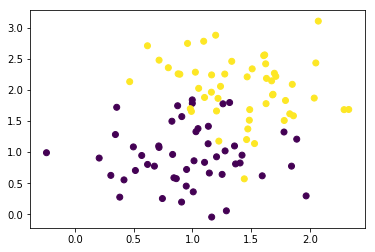

In [3]:
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2])
plt.show()

## Model the classifier

In [4]:
# Our model is: y = sigmoid(X*W + b)
# Or, with artificial x0 = 1, y = sigmoid(X*W)

# calculate line 0 = x1*w1 + x2*w2 + w0
def z(x):
    return -(x * W[1] + W[0]) / W[2]

# initial values for w and b
W = [1.0, 1.0, -2.0]

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def getClass(x, th):
    return np.where(x < th, 0.0, 1.0)

def predict(X, W):
    return sigmoid(X.dot(W))

In [6]:
ones = np.ones((N, 1))
data_wo_labels = np.concatenate((ones, data[:, :2]), axis=1)

Y = predict(data_wo_labels, W)
labels = getClass(Y, 0.5)
labels[:5]

array([0., 0., 0., 1., 0.])

### Untrained classificator predictions

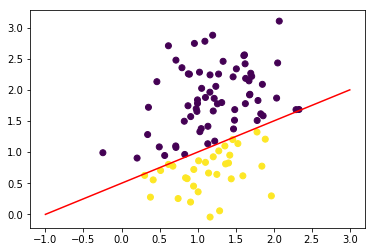

In [7]:
x = np.linspace(-1.0, 3.0)
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.plot(x, z(x), color='red')

In [8]:
# Calculate cross-entropy
def cross_entropy(T, Y):
    return -np.mean(T * np.log(Y) + (1 - T) * np.log(1 - Y))

# error on untrained model
cross_entropy(data[:, 2], Y)

1.3828230502607106

## Train the model

### Split into training set and validation set

In [9]:
M = 30

X_train = np.concatenate((np.ones((N - M, 1)), data[:-M, :2]), axis=1)
T_train = data[:-M, 2]

X_test = np.concatenate((np.ones((M, 1)), data[-M:, :2]), axis=1)
T_test = data[-M:, 2]

### Plot the train and test data

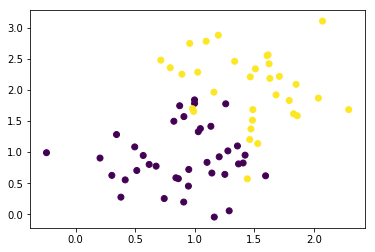

In [10]:
plt.scatter(X_train[:, 1], X_train[:, 2], c=T_train)
plt.show()

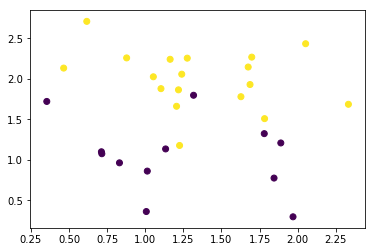

In [11]:
plt.scatter(X_test[:, 1], X_test[:, 2], c=T_test)
plt.show()

### Gradient descent

In [12]:
print(X_train.shape)

# initial parameters
W = [1.0, 1.0, -1.0]

# training rate
alpha = 0.01

# error_delta
err_delta = 0.001

# get starting error
Y_train = predict(X_train, W)
err_prev = cross_entropy(T_train, Y_train)

# counter
cnt = 0

while True:
    # print error every 10 steps
    if cnt % 10 == 0:
        print('error: ' + str(err_prev))
    cnt = cnt + 1
    
    # gradient descent
    grad_W = X_train.T.dot(T_train - Y_train)
    W = W + alpha * grad_W
    
    # re-evaluate model
    Y_train = predict(X_train, W)
    err = cross_entropy(T_train, Y_train)

    # check if trained
    if abs(err - err_prev) < err_delta:
        break
    err_prev = err
    

print('final error: ' + str(err))
print('iterations: ' + str(cnt))

(70, 3)
error: 0.9880700184895255
error: 0.6994044218604322
error: 0.5550864703350593
error: 0.4784354202261967
error: 0.43185828359468886
error: 0.40020808381203615
error: 0.37698185050566735
error: 0.35902018297783334
error: 0.34460572419947855
error: 0.33271750709530384
final error: 0.32651649648995446
iterations: 96


### Validate the model

In [13]:
Y_test = predict(X_test, W)
validation_err = cross_entropy(T_test, Y_test)
validation_err

0.3718135716154853

### Plot the final classificator

On complete dataset

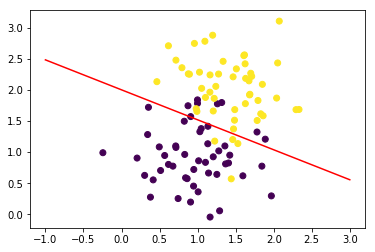

In [14]:
x = np.linspace(-1.0, 3.0)
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2])
plt.plot(x, z(x), color='red')

On test data

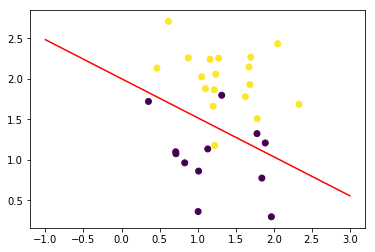

In [15]:
x = np.linspace(-1.0, 3.0)
plt.scatter(X_test[:, 1], X_test[:, 2], c=T_test)
plt.plot(x, z(x), color='red')
plt.show()

### Confusion matrix

In [16]:
labels = getClass(Y_test, 0.5)

tp = np.where((labels == 1.0) & (T_test == 1.0), 1, 0).sum()
tn = np.where((labels == 0.0) & (T_test == 0.0), 1, 0).sum()
fp = np.where((labels == 1.0) & (T_test == 0.0), 1, 0).sum()
fn = np.where((labels == 0.0) & (T_test == 1.0), 1, 0).sum()

In [17]:
conf_matrix = np.array([[tp, fp], [fn, tn]])
conf_matrix

array([[17,  3],
       [ 1,  9]])

### Precision and recall

In [18]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("precision: " + str(precision))
print("recall: " + str(recall))

precision: 0.85
recall: 0.9444444444444444


### ROC Curve

In [19]:
S = 100
ths = np.linspace(0.1, 0.99, S)

def fp_rate(th):
    labels = getClass(Y_test, th)
    tn = np.where((labels == 0.0) & (T_test == 0.0), 1, 0).sum()
    fp = np.where((labels == 1.0) & (T_test == 0.0), 1, 0).sum()
    return fp / (fp + tn)

def tp_rate(th):
    labels = getClass(Y_test, th)
    tp = np.where((labels == 1.0) & (T_test == 1.0), 1, 0).sum()
    fn = np.where((labels == 0.0) & (T_test == 1.0), 1, 0).sum()
    return tp / (tp + fn)

roc = np.empty((S, 2))
for i, th in enumerate(ths):
    roc[i, 0] = fp_rate(th)
    roc[i, 1] = tp_rate(th)

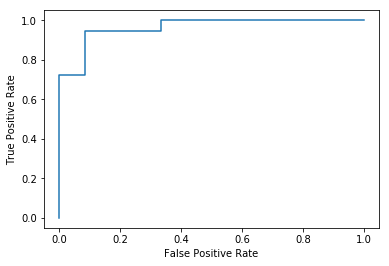

In [20]:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(roc[:, 0], roc[:, 1])

## Conclusions

Gradient descent with learning rate = 0.01 allowed training model in 96 iterations, achieving error of 0.372 on validation set
Given the threshold of 0.5, the model achieved precision of 0.85 and recall of 0.94